## Polynomial Regression : 다항회귀

### Polynomial Features
- 1차 방정식을 고차다항식으로 변경하는 기법
- x1 + x2 → x1 + x2 + x1x2 + x1^2 + x2^2
- sklearn.preprocessing.PolynomialFeatures 사용

In [2]:
import numpy as np
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit_transform(X)
# x0, x1, x2, x1^2, x1x2, x2^2

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [6]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)
# x0, x1, x2, x1x2

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

### Dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def f(size):
    x = np.linspace(0, 5, size) # 0부터 5사이 값으로 size값을 균등하게 나누기
    y = x * np.sin(x**2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x**2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)

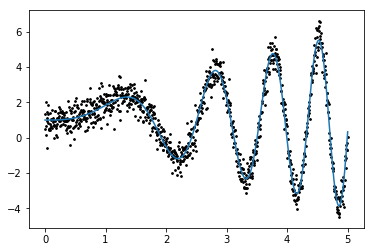

In [11]:
f_x, f_y = f(1000)
plt.plot(f_x,f_y)
X,y = sample(1000)
plt.scatter(X,y,s=3,c="black")
plt.show()

In [12]:
X # 점들의 값

array([0.        , 0.00500501, 0.01001001, 0.01501502, 0.02002002,
       0.02502503, 0.03003003, 0.03503504, 0.04004004, 0.04504505,
       0.05005005, 0.05505506, 0.06006006, 0.06506507, 0.07007007,
       0.07507508, 0.08008008, 0.08508509, 0.09009009, 0.0950951 ,
       0.1001001 , 0.10510511, 0.11011011, 0.11511512, 0.12012012,
       0.12512513, 0.13013013, 0.13513514, 0.14014014, 0.14514515,
       0.15015015, 0.15515516, 0.16016016, 0.16516517, 0.17017017,
       0.17517518, 0.18018018, 0.18518519, 0.19019019, 0.1951952 ,
       0.2002002 , 0.20520521, 0.21021021, 0.21521522, 0.22022022,
       0.22522523, 0.23023023, 0.23523524, 0.24024024, 0.24524525,
       0.25025025, 0.25525526, 0.26026026, 0.26526527, 0.27027027,
       0.27527528, 0.28028028, 0.28528529, 0.29029029, 0.2952953 ,
       0.3003003 , 0.30530531, 0.31031031, 0.31531532, 0.32032032,
       0.32532533, 0.33033033, 0.33533534, 0.34034034, 0.34534535,
       0.35035035, 0.35535536, 0.36036036, 0.36536537, 0.37037

In [13]:
X.shape,y.shape

((1000,), (1000,))

In [19]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

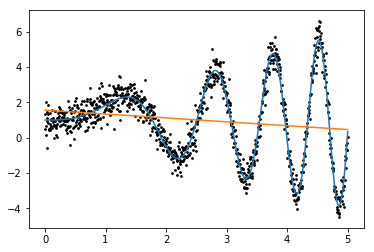

In [18]:
f_x, f_y = f(1000)
plt.plot(f_x,f_y)
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(),lr.predict(X).flatten())
plt.show()

### Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]
# x0, x1, x1^2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [22]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

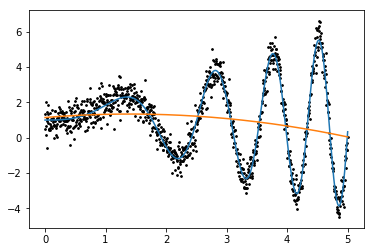

In [24]:
f_x, f_y = f(1000)
plt.plot(f_x,f_y)
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(),lr.predict(X_poly).flatten())
plt.show()

In [32]:
poly_features = PolynomialFeatures(degree=9)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18]])

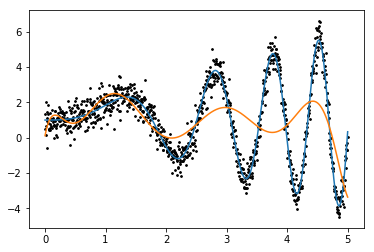

In [33]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)
f_x, f_y = f(1000)
plt.plot(f_x,f_y)
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(),lr.predict(X_poly).flatten())
plt.show()

###  무슨값을 최소화시켜서 모델을 fitting을 시켜줄 것인가?

In [31]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [36]:
poly_range = list(range(10,50)) # 10 ~ 49 -> 40개
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept = False)
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly),y))
    
    lasso = Lasso(fit_intercept = False) # L1
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly),y))
    
    ridge = Ridge(fit_intercept = False) # L2
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly),y))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.855329e-18
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.071427e-19
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.281900e-21
  o

In [38]:
import pandas as pd
from pandas import DataFrame
data = {"poly_range" : poly_range,"lr_rmse":rmse_lr_list,
       "lasso_rmse": rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.912166,2.332152,1.936598
11,1.905010,2.333637,1.917115
12,1.656046,2.334063,1.915896
13,1.387340,2.333418,1.890038
14,1.374999,2.332183,1.737486
15,0.959542,2.330765,1.584834
16,0.745900,2.329433,1.524820
17,0.704505,2.328327,1.517515
18,0.731548,2.327495,0.920424


### How to optimize
- RMSE의 최소값을 찾자
- Ridge, Lasso, LR 모두 다 써보자
- Degree를 10 ~ 50까지 써보기
- 결과를 한눈에 정리해보기

In [39]:
df.min() # 제일 작은 값 파악 -> ridge

lr_rmse       0.59794
lasso_rmse    2.32653
ridge_rmse    0.53723
dtype: float64

In [40]:
df["ridge_rmse"].sort_values().head()

poly_range
22    0.537230
23    0.544085
21    0.639255
24    0.683496
20    0.777437
Name: ridge_rmse, dtype: float64

In [41]:
poly_features = PolynomialFeatures(degree=22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge()
ridge.fit(X_poly,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

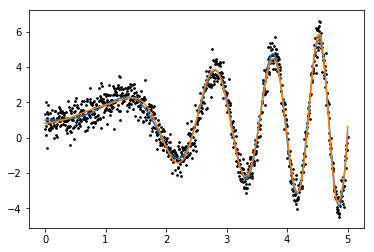

In [43]:
f_x, f_y = f(1000)
plt.plot(f_x,f_y)
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(),ridge.predict(X_poly).flatten())
plt.show()

### 언제쓰나?
- 한 개 변수가 Y값과 비선형적인 관계가 있다고 의심
- 주기적인 패턴을 보이는 Series 데이터
- 모델 자체가 복잡해지면 해결가능한 부분이 많음 → SVM, Tree-based models

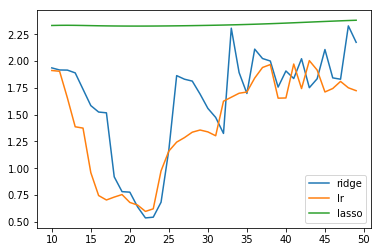

In [44]:
plt.plot(poly_range, df["ridge_rmse"],label="ridge")
plt.plot(poly_range, df["lr_rmse"],label="lr")
plt.plot(poly_range, df["lasso_rmse"],label="lasso") # L1 : Sparse solution
plt.legend()
plt.show()

### Challenge

In [45]:
df = pd.read_csv("yield.csv",sep="\t")
df.head()

,i,Temp,Yield
0,1,50,3.3
1,2,50,2.8
2,3,50,2.9
3,4,70,2.3
4,5,70,2.6
